## Getting Data 

In [1]:
import pandas as pd
import numpy as np

## AAPL DATA

In [2]:
data2 = pd.read_csv('AAPL.csv')

In [3]:
data2['Adj Close'].isnull().sum()

1

In [4]:
data2.dropna(inplace=True)

In [5]:
data2.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1980-12-12,0.513393,0.515625,0.513393,0.513393,0.410525,117258400.0
1,1980-12-15,0.488839,0.488839,0.486607,0.486607,0.389106,43971200.0
2,1980-12-16,0.453125,0.453125,0.450893,0.450893,0.360548,26432000.0
3,1980-12-17,0.462054,0.464286,0.462054,0.462054,0.369472,21610400.0
4,1980-12-18,0.475446,0.477679,0.475446,0.475446,0.380182,18362400.0


In [6]:
data2.describe()

,Open,High,Low,Close,Adj Close,Volume
count,9744.000000,9744.000000,9744.000000,9744.000000,9744.000000,9.744000e+03
mean,28.756519,29.033278,28.466649,28.755930,26.938004,8.668763e+07
std,50.554982,50.996655,50.112409,50.563243,48.858499,8.640497e+07
min,0.198661,0.198661,0.196429,0.196429,0.157070,3.472000e+05
25%,1.060602,1.080357,1.037857,1.060714,0.915450,3.356662e+07
50%,1.690357,1.725715,1.660714,1.694643,1.452018,5.849950e+07
75%,28.424643,28.696786,28.022143,28.302499,24.793811,1.082242e+08
max,230.779999,233.470001,229.779999,232.070007,229.392090,1.855410e+09


## Imports 

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.svm import SVR
import time

In [8]:
data2.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1980-12-12,0.513393,0.515625,0.513393,0.513393,0.410525,117258400.0
1,1980-12-15,0.488839,0.488839,0.486607,0.486607,0.389106,43971200.0
2,1980-12-16,0.453125,0.453125,0.450893,0.450893,0.360548,26432000.0
3,1980-12-17,0.462054,0.464286,0.462054,0.462054,0.369472,21610400.0
4,1980-12-18,0.475446,0.477679,0.475446,0.475446,0.380182,18362400.0


## Windowing with size = 10

In [9]:
df = pd.DataFrame(data2['Adj Close'])

In [10]:
df['Predictions'] = df['Adj Close'].shift(-10)

In [11]:
x = df['Adj Close']

In [12]:
x = x[:-10]

In [13]:
y = np.array(df['Predictions'])

In [14]:
y = y[:-10]

In [15]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2)

## Training Different Model 

In [16]:
svr_linear = SVR(kernel = 'linear', C = 1e3)
svr_poly = SVR(kernel = 'poly', degree = 2, C = 1e3)
svr_rbf = SVR(kernel = 'rbf', gamma = 0.1, C = 1e3)

In [17]:
x_train = np.array(x_train).reshape(-1,1)
y_train = np.array(y_train).reshape(-1,1)
x_test = np.array(x_test).reshape(-1,1)
y_test = np.array(y_test).reshape(-1,1)

## Optimization using GridSearchCV 

In [18]:
parameters = {'kernel': ['linear', 'rbf'], 'C':[100,1000]} 

In [19]:
from sklearn.model_selection import GridSearchCV

In [20]:
svrsvr_optimal = SVR()

clf = GridSearchCV(svr, param_grid=parameters, n_jobs=-1, cv = 5)

clf.fit(x_train, y_train) 

clf.best_params_

## Optimal Model 

In [21]:
svr_optimal = SVR(kernel = 'rbf', C = 100 )

In [22]:
start = time.time()
svr_optimal.fit(x_train, y_train)

C:\Users\kumar\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\kumar\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVR(C=100, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
    gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)

In [23]:
predictions = svr_optimal.predict(x_test)

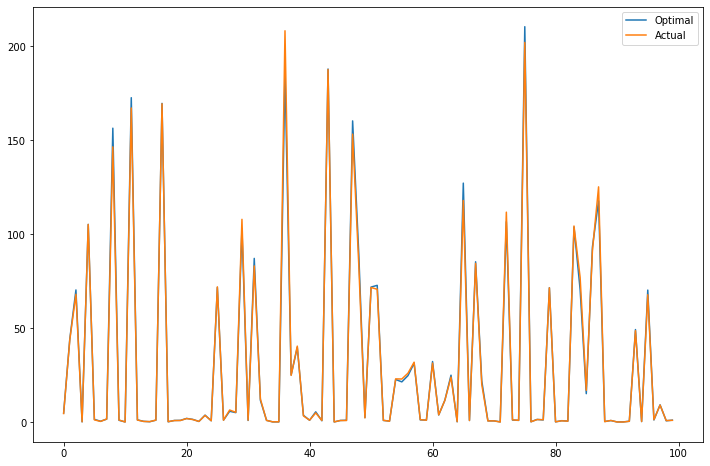

In [24]:
fig = plt.figure(figsize = (12,8))
plt.plot(predictions[:100], label = 'Optimal')
plt.plot(y_test[:100], label = 'Actual')
plt.legend()

In [25]:
mean_absolute_error(y_test, predictions)

1.1792203284126659

In [26]:
mean_squared_error(y_test, predictions)

17.41510645580223

## Fitting Model

In [27]:
svr_linear.fit(x_train, y_train)

C:\Users\kumar\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1000.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
    gamma='auto_deprecated', kernel='linear', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)

svr_poly.fit(x_train, y_train)

In [28]:
svr_rbf.fit(x_train, y_train)

C:\Users\kumar\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1000.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.1,
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [29]:
pred2 = svr_rbf.predict(x_test)

In [30]:
pred = svr_linear.predict(x_test)

pred3 = svr_poly.predict(x_test)

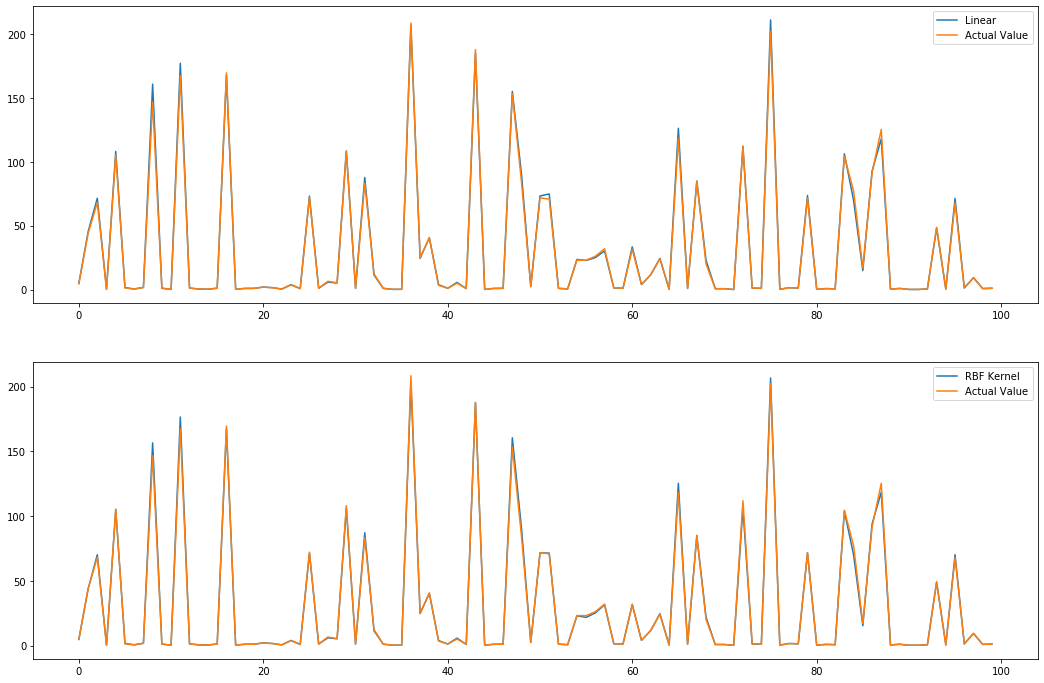

In [31]:
fig,ax = plt.subplots(2,1,figsize = (18,12))
ax[0].plot(pred[:100], label = 'Linear')
ax[0].plot(y_test[:100], label = 'Actual Value')
ax[0].legend()

ax[1].plot(pred2[:100], label = 'RBF Kernel')
ax[1].plot(y_test[:100], label = 'Actual Value')


ax[1].legend()

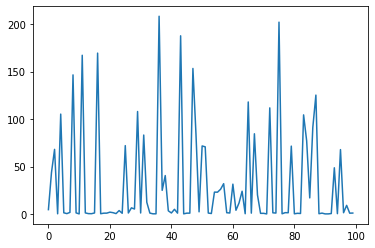

In [32]:

plt.plot(y_test[:100], label = 'Actual Value')
 

axes = plt.gca()
plt.plot(pred3[:100])


In [33]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [34]:
mean_squared_error(y_test, pred)

7.975094435136313

In [35]:
mean_squared_error(y_test, pred2)

9.528760422206863

In [36]:
mean_absolute_error(y_test, pred)

1.0972523030230479

In [37]:
mean_absolute_error(y_test, pred2)

1.0812400670056228

mean_squared_error(y_test, pred3)

mean_absolute_error(y_test, pred3)

In [38]:
svr_linear.predict([[.410525]])

array([0.40832056])

In [39]:
svr_rbf.predict([[.410525]])

array([0.42840485])